In [1]:
import numpy as np
import pandas as pd

from pydataset import data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

from wrangle import wrangle_telco
import split_scale as ss
import explore as ex
import evaluate as ev
import feature_engineering as fe

In [2]:
def select_kbest(features, target_variable, k):
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(features, target_variable)
    X_reduced = f_selector.transform(features)
    f_support = f_selector.get_support()
    f_feature = features.loc[:,f_support].columns.tolist()
    return f_feature

In [3]:
def rfe_function(features, target_variable, k):
    lm = LinearRegression()
    rfe = RFE(lm, k)
    rfe.fit(features, target_variable)
    X_rfe = rfe.transform(features)
    mask = rfe.support_
    rfe_features = features.loc[:, mask].columns.tolist()
    return rfe_features

### 1. Load the tips dataset.

- a. Create a column named tip_percentage. This should be the tip amount divided by the total bill.
- b. Create a column named price_per_person. This should be the total bill divided by the party size.
- c. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?
- d. Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- e. Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?
- f. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

In [4]:
tips = data("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# a. Create a column named tip_percentage.
# This should be the tip amount divided by the total bill.
tips["tip_percentage"] = tips["tip"] / tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [6]:
# b. Create a column named price_per_person.
# This should be the total bill divided by the party size.
tips["price_per_person"] = tips["total_bill"] / tips["size"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927,9.676667
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584,13.590000
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222,11.335000
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204,8.910000


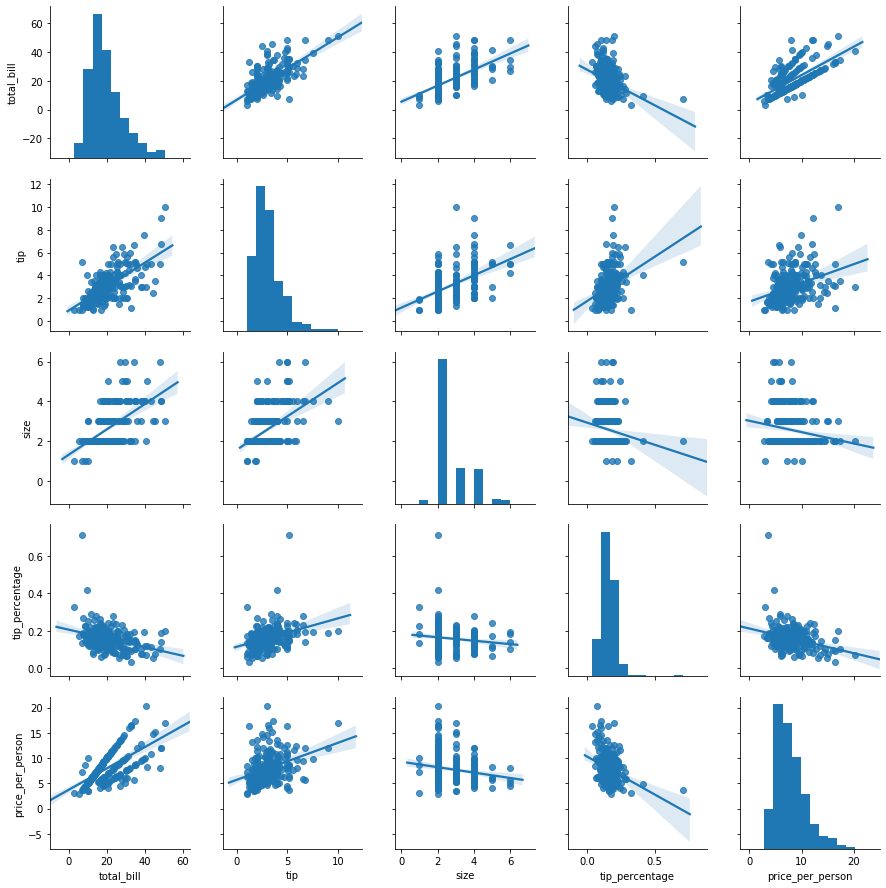

In [7]:
# c. Before using any of the methods discussed in the lesson,
# which features do you think would be most important for
# predicting the tip amount? The tip percentage?
sns.pairplot(data=tips, kind="reg")
plt.show()

In [8]:
# d. Use all the other numeric features to predict tip amount.
# Use select k best and recursive feature elimination to select the
# top 2 features. What are they?
tips = tips.drop(columns=["sex", "smoker", "day", "time"])
tips

,total_bill,tip,size,tip_percentage,price_per_person
1,16.99,1.01,2,0.059447,8.495000
2,10.34,1.66,3,0.160542,3.446667
3,21.01,3.50,3,0.166587,7.003333
4,23.68,3.31,2,0.139780,11.840000
5,24.59,3.61,4,0.146808,6.147500
...,...,...,...,...,...
240,29.03,5.92,3,0.203927,9.676667
241,27.18,2.00,2,0.073584,13.590000
242,22.67,2.00,2,0.088222,11.335000
243,17.82,1.75,2,0.098204,8.910000


In [9]:
train, test = ss.split_my_data(tips, .8, 56)

In [10]:
train.shape

(195, 5)

In [11]:
test.shape

(49, 5)

In [12]:
# For the feature engineering methods,
# we want to use the scaled data
scaler, train, test = ss.standard_scaler(train, test)

In [13]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
train.head()

,total_bill,tip,size,tip_percentage,price_per_person
3,0.122108,0.292835,0.469692,0.048355,-0.325697
99,0.122108,-0.056717,-0.607837,-0.328668,0.887011
155,-0.016458,-0.755822,1.547221,-0.988125,-1.039411
196,-1.380890,-1.147321,-0.607837,0.426815,-1.442012
61,0.041650,0.090095,-0.607837,-0.084426,0.762335


In [15]:
test.head()

,total_bill,tip,size,tip_percentage,price_per_person
13,-0.502558,-1.056437,-0.607837,-0.977789,-0.080962
43,-0.667944,-0.014771,-0.607837,0.886818,-0.337241
126,1.104365,0.782209,3.702279,-0.357970,-1.031042
202,-0.802040,-0.748831,-0.607837,-0.091321,-0.545035
127,-1.273613,-1.119356,-0.607837,0.161179,-1.275777


> Question: I thought we were not going to scale our target variable?

In [16]:
X_train = train.drop(columns="tip")
X_test = test.drop(columns="tip")
y_train = train[["tip"]]
y_test = test[["tip"]]

In [17]:
X_train

,total_bill,size,tip_percentage,price_per_person
3,0.122108,0.469692,0.048355,-0.325697
99,0.122108,-0.607837,-0.328668,0.887011
155,-0.016458,1.547221,-0.988125,-1.039411
196,-1.380890,-0.607837,0.426815,-1.442012
61,0.041650,-0.607837,-0.084426,0.762335
...,...,...,...,...
163,-0.414278,0.469692,-0.636148,-0.879814
193,0.952389,-0.607837,-1.164758,2.173601
144,0.797060,3.702279,0.337569,-1.189773
229,-0.741697,-0.607837,0.654045,-0.451528


In [18]:
X_test.shape

(49, 4)

In [19]:
y_train

,tip
3,0.292835
99,-0.056717
155,-0.755822
196,-1.147321
61,0.090095
...,...
163,-0.755822
193,-0.364323
144,1.341493
229,-0.252466


In [20]:
y_test.shape

(49, 1)

#### Select K Best

In [21]:
# initialize f_selector object
f_selector = SelectKBest(f_regression, k=2)

In [22]:
# fit object to data
f_selector.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=2, score_func=<function f_regression at 0x125675710>)

In [23]:
# transform DataFrame
X2 = f_selector.transform(X_train)

In [24]:
print(X2.shape)
print(X_train.shape)

(195, 2)
(195, 4)


In [25]:
# get list of selected features
f_support = f_selector.get_support()
f_support # mask

array([ True,  True, False, False])

In [26]:
# use .loc with mask to subset selected features
f_feature = X_train.loc[:, f_support].columns.tolist()
f_feature

['total_bill', 'size']

In [27]:
select_kbest(features=X_train, target_variable=y_train, k=2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'size']

#### Recursive Feature Elimination

In [28]:
# initialize linear regression object
lm = LinearRegression()

In [29]:
# initialize RFE object
rfe = RFE(lm, 2)

In [30]:
# fit the RFE object to data
# transform DataFrame to only inclue those 2 features 
X_rfe = rfe.fit_transform(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# fitting the data to model
lm.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# create mask for selected features
mask = rfe.support_

In [33]:
# index columns
rfe_features = X_train.loc[:, mask].columns.tolist()
rfe_features

['total_bill', 'tip_percentage']

In [34]:
rfe_function(features=X_train, target_variable=y_train, k=2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip_percentage']

In [35]:
# get feature rank
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()

ranks = pd.DataFrame({"Variable": var_names, "Rank": var_ranks})
ranks

,Variable,Rank
0,total_bill,1
1,size,2
2,tip_percentage,1
3,price_per_person,3


In [36]:
# Use all the other numeric features to predict tip percentage.
# Use select k best and recursive feature elimination to select
# the top 2 features. What are they?

train, test = ss.split_my_data(tips, .8, 56) # split data
scaler, train, test = ss.standard_scaler(train, test) # scale data
X_train = train.drop(columns="tip_percentage")
X_test = test.drop(columns="tip_percentage")
y_train = train[["tip_percentage"]]
y_test = test[["tip_percentage"]]

In [37]:
# Select K Best
X2 = SelectKBest(f_regression, k=2).fit_transform(X_train, y_train)
f_support = f_selector.get_support()
f_feature = X_train.loc[:, f_support].columns.tolist()
f_feature

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

In [38]:
# RFE
lm = LinearRegression()
rfe = RFE(lm, 2)
X_rfe = rfe.fit_transform(X_train, y_train)
mask = rfe.support_
rfe_features = X_train.loc[:, mask].columns.tolist()
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()
ranks = pd.DataFrame({"Variable": var_names, "Rank": var_ranks})
ranks

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variable,Rank
0,total_bill,1
1,tip,1
2,size,3
3,price_per_person,2


---
### 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [39]:
# def select_kbest(features, target_variable, k):
#     X2 = SelectKBest(f_regression, k=k).fit_transform(features, target_variable)
#     f_support = f_selector.get_support()
#     f_feature = features.loc[:, f_support].columns.tolist()
#     return f_feature

In [40]:
select_kbest(features=X_train, target_variable=y_train, k=2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

### 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [41]:
# def rfe_function(features, target_variable, k):
#     lm = LinearRegression()
#     rfe = RFE(lm, k)
#     X_rfe = rfe.fit_transform(features, target_variable)
#     mask = rfe.support_
#     rfe_features = features.loc[:, mask].columns.tolist()
#     return rfe_features

In [42]:
rfe_function(features=X_train, target_variable=y_train, k=2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['total_bill', 'tip']

### 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [43]:
swiss = data("swiss")
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [44]:
train, test = ss.split_my_data(swiss, .8, 56)
scaler, train, test = ss.standard_scaler(train, test)

In [45]:
train.shape

(37, 6)

In [46]:
test.shape

(10, 6)

In [47]:
X_train = train.drop(columns="Fertility")
X_test = test.drop(columns="Fertility")
y_train = train[["Fertility"]]
y_test = test[["Fertility"]]

In [48]:
X_train

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Gruyere,0.006405,-0.452371,-0.301911,1.343641,0.344869
ValdeTravers,-1.633487,1.316657,-0.301911,-0.789108,-0.219739
La Chauxdfnd,-2.154839,1.860973,0.123640,-0.665964,0.156666
Conthey,1.551505,-1.677083,-0.833850,1.392516,-1.875922
Neuveville,-0.458073,0.228024,0.549191,-0.872722,0.194306
Avenches,0.357133,0.500183,0.230028,-0.890211,0.984757
Herens,1.731608,-1.404925,-0.833850,1.399463,-0.671426
Yverdon,-0.173699,-0.044134,-0.195523,-0.850201,0.909476
Rolle,0.361873,0.091945,0.017252,-0.811389,-1.424236
Boudry,-0.699791,1.452736,0.230028,-0.861701,0.081385


In [49]:
X_test

,Agriculture,Examination,Education,Catholic,Infant.Mortality
St Maurice,1.077548,-0.860608,-0.089136,1.376943,-0.859628
Glane,0.693643,-0.180213,-0.195523,1.331422,1.812849
La Vallee,-1.799371,2.133132,1.081130,-0.944836,-3.494465
Vevey,-1.249581,1.316657,0.974742,-0.554079,0.307228
Moutier,-0.789843,-0.452371,-0.301911,-0.187281,0.081385
Lausanne,-1.600310,1.452736,1.932231,-0.706213,0.043744
Martigwy,1.186558,-0.452371,-0.408299,1.374547,-0.257380
Morges,0.314477,0.908420,0.017252,-0.871045,-0.784347
Neuchatel,-1.685622,2.677448,2.357782,-0.590975,1.097679
Le Locle,-1.728278,0.908420,0.336415,-0.727536,-0.445582


In [50]:
y_train

,Fertility
Gruyere,0.947414
ValdeTravers,-0.240596
La Chauxdfnd,-0.393111
Conthey,0.393545
Neuveville,0.505924
Avenches,-0.136244
Herens,0.538032
Yverdon,-0.417192
Rolle,-0.810519
Boudry,-0.015837


In [51]:
y_test

,Fertility
St Maurice,-0.449300
Glane,1.750123
La Vallee,-1.308199
Vevey,-0.987116
Moutier,1.220335
Lausanne,-1.195820
Martigwy,-0.007810
Morges,-0.409165
Neuchatel,-0.497463
Le Locle,0.168786


In [52]:
# def select_kbest(features, target_variable):
#     X2 = SelectKBest(f_regression, k=2).fit_transform(features, target_variable)
#     f_support = f_selector.get_support()
#     f_feature = X_train.loc[:, f_support].columns.tolist()
#     return f_feature

In [53]:
# select_kbest(features=X_train, target_variable=y_train, k=3)

In [54]:
# def select_kbest(features, target_variable, k):
#     f_selector = SelectKBest(f_regression, k=3)
#     f_selector.fit(X_train, y_train)
#     X_reduced = f_selector.transform(X_train)
#     f_support = f_selector.get_support()
#     f_feature = X_train.loc[:,f_support].columns.tolist()
#     return f_feature

In [55]:
# f_selector = SelectKBest(f_regression, k=3)
# f_selector.fit(X_train, y_train)
# X_reduced = f_selector.transform(X_train)
# f_support = f_selector.get_support()
# f_feature = X_train.loc[:,f_support].columns.tolist()
# f_feature

In [56]:
select_kbest(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Examination', 'Education', 'Catholic']

In [57]:
rfe_function(features=X_train, target_variable=y_train, k=3)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Agriculture', 'Education', 'Catholic']